In [11]:
# 1.Importing Necessary Modules and Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [23]:
# 2.Loading the Dataset into a Variable

data = load_breast_cancer()

In [31]:
# 3.Exploring the Dataset

df=pd.DataFrame(data.data,columns=data.feature_names)
df.sample(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
64,12.68,23.84,82.69,499.0,0.11220,0.1262,0.11280,0.06873,0.1905,0.06590,...,17.09,33.47,111.8,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.10310
375,16.17,16.07,106.30,788.5,0.09880,0.1438,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.1,861.5,0.1235,0.2550,0.2114,0.1251,0.3153,0.08960
218,19.80,21.56,129.70,1230.0,0.09383,0.1306,0.12720,0.08691,0.2094,0.05581,...,25.73,28.64,170.3,2009.0,0.1353,0.3235,0.3617,0.1820,0.3070,0.08255
87,19.02,24.59,122.00,1076.0,0.09029,0.1206,0.14680,0.08271,0.1953,0.05629,...,24.56,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.1956,0.3956,0.09288
444,18.03,16.85,117.50,990.0,0.08947,0.1232,0.10900,0.06254,0.1720,0.05780,...,20.38,22.02,133.3,1292.0,0.1263,0.2666,0.4290,0.1535,0.2842,0.08225


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [37]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [43]:
df2=pd.DataFrame(data.target,columns=['target'])
df2.sample(5)

,target
257,0
306,1
450,1
201,0
455,1


([<matplotlib.patches.Wedge at 0x1ae7f21a180>,
 [Text(-0.4286546999573329, 1.0130425204326268, '1'),
  Text(0.428654605109445, -1.013042560566172, '0')],
 [Text(-0.23381165452218156, 0.5525686475087055, '62.74%'),
  Text(0.23381160278696997, -0.55256866939973, '37.26%')])

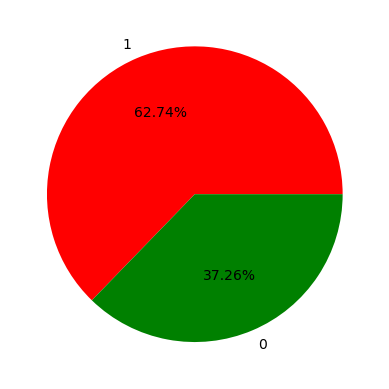

In [45]:
class_counts=df2["target"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct= '%1.2f%%', colors=["red","green"])

In [62]:
# 4.Splitting the Data into Training and Testing Sets

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)


In [64]:
# 5.Building and Training the Model

model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [68]:
# 6.Making Predictions

y_pred = model.predict(x_test)
print(y_pred[:10])


[1 0 0 1 1 0 0 0 1 1]


In [72]:
# 7.Evaluating Model Accuracy

accuracy = accuracy_score( y_test, y_pred)
print(f"Model Accuracy:{accuracy * 100:.2f}%")

Model Accuracy:94.15%
